In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import math

### Белый шум ~uniform (-1, 1)

In [2]:
n = 1000
t0 = 0
t1 = 10

t = np.linspace(t0, t1, n)

normal_noise = [np.random.normal() for _ in range(n)]
uniform_noise = [np.random.uniform(-1, 1) for _ in range(n)]

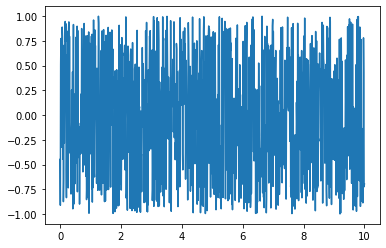

In [3]:
_ =plt.plot(t, uniform_noise)

### Параметры процесса

In [4]:
sigma = 1
alpha = 3
D = sigma**2

m = 100
n = 200
t0 = 0
t1 = 10
dt = (t1 - t0) / n

#### Автокорреляционная функция

In [5]:
def get_R(D, alpha):
    def R(tau):
        return D * np.exp(-alpha * abs(tau)) * (1 + alpha * abs(tau))
    
    return R

#### Импульсная харастеристика фильтра

In [6]:
def get_h(D, alpha, sigma):
    def h(tau):
        return np.exp(-alpha * tau) * tau * np.sqrt((2 * D * alpha**3)/ (math.pi / sigma**2))
    
    return h

#### Спектральная плотность

In [7]:
def get_S(D, alpha):
    def S(omega):
        return ((2*D*alpha**3)/math.pi)/((alpha**2 + omega**2)**2)
    
    return S

In [8]:
h = get_h(D, alpha, sigma)
R = get_R(D, alpha)
S = get_S(D, alpha)

### Графики исходных функций

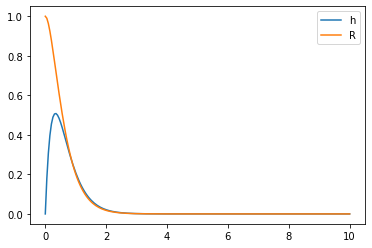

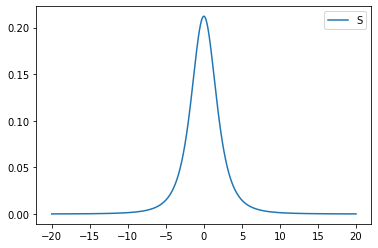

In [9]:
hs = []
Ss = []
Rs = []

t = np.linspace(t0, t1, n)
oms = np.linspace(-20, 20, 1000)

for k in range(n):
    hs.append(h(dt * k))
    Rs.append(R(dt * k))

for omega in oms:
    Ss.append(S(omega))

plt.plot(t, hs, label='h')
plt.plot(t, Rs, label='R')
plt.legend();
plt.show()

plt.plot(oms, Ss, label='S')
plt.legend();
plt.show()

### Проверка эргодичности процесса

In [10]:
def get_slutsky_criteria(R, T, dt, n):
    return 2 * dt / T * sum((1 - k * dt / T) * R(k * dt) for k in range(n))

def plot_slutsky_criteria(dt, R):
    slutsky = []
    T_vals = list(range(5, 100, 4)) + list(range(100, 200, 7))
    
    for T in T_vals:
        slutsky.append(get_slutsky_criteria(R, T, 0.1, T * 10))
    
    return T_vals, slutsky

In [11]:
R = get_R(D, alpha)
T_vals, slutsky = plot_slutsky_criteria(dt, R)

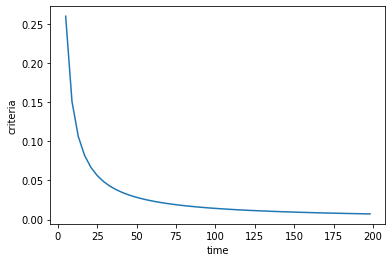

In [12]:
plt.title('')
plt.ylabel('criteria')
plt.xlabel('time')
plt.plot(T_vals, slutsky);

### Построим реализации процесса

In [13]:
def get_realization(n, h, dt, hlim=1e-20):
    x = [np.random.uniform(-1, 1) for _ in range(n)]
    y = []
    
    for j in range(n):
        cur_y = 0
        for i in range(min(100, j + 1)):
            cur_val = h(dt * i) * x[j - i]
            
          
            cur_y += cur_val
         
        y.append(cur_y)
    
    return y

def get_realizations(t0, t1, n, m, h):
    realizations = []
    t = np.linspace(t0, t1, n)

    for q in range(m):
        y = get_realization(n, h, dt)

        realizations.append(y)
    
    return t, realizations

In [14]:
t, realizations = get_realizations(t0, t1, n, m, h)

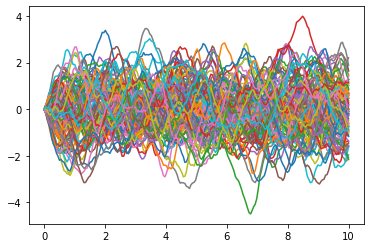

In [15]:
for y in realizations:
    plt.plot(t, y)

### Усредненные по реализациям матожидания

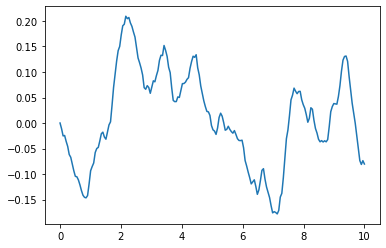

In [16]:
def get_expectations(realizations, n):
    realizations = np.array(realizations)
    return [np.mean(realizations[:, i]) for i in range(n)]

mys = get_expectations(realizations, n)
plt.plot(t, mys);

### Оценка матожидания для эргодического процесса

In [17]:
def get_ergodic_exp(y, T, dt):
    return dt / T * sum(y)

def plot_ergodic(dt, h):
    my_erg = []
    T_vals = list(range(5, 100, 4)) + list(range(100, 200, 20)) + list(range(200, 2000, 500))
    
    for T in T_vals:
        print(T)
        big_t, realizations_big_t = get_realizations(0, T, T * 10, 1, h)
        my_erg.append(get_ergodic_exp(realizations_big_t[0], T, 0.1))
    
    return T_vals, my_erg

In [18]:
T_vals, my_erg = plot_ergodic(dt, h)

5
9
13
17
21
25
29
33
37
41
45
49
53
57
61
65
69
73
77
81
85
89
93
97
100
120
140
160
180
200
700
1200
1700


In [19]:
for i in range(len(T_vals)):
    print('expectation with T = {:3}: {:.5}'.format(T_vals[i], my_erg[i]))

expectation with T =   5: -0.34209
expectation with T =   9: -0.66223
expectation with T =  13: 0.45249
expectation with T =  17: 0.056071
expectation with T =  21: 0.65361
expectation with T =  25: 0.31573
expectation with T =  29: 0.22478
expectation with T =  33: 0.027017
expectation with T =  37: -0.042703
expectation with T =  41: -0.32095
expectation with T =  45: 0.2153
expectation with T =  49: 0.091252
expectation with T =  53: 0.11881
expectation with T =  57: -0.10159
expectation with T =  61: -0.13006
expectation with T =  65: 0.12307
expectation with T =  69: 0.14282
expectation with T =  73: -0.27513
expectation with T =  77: 0.072595
expectation with T =  81: -0.10037
expectation with T =  85: -0.077232
expectation with T =  89: 0.0028152
expectation with T =  93: -0.22837
expectation with T =  97: -0.24112
expectation with T = 100: 0.075797
expectation with T = 120: -0.12752
expectation with T = 140: -0.16883
expectation with T = 160: 0.21718
expectation with T = 180: 0

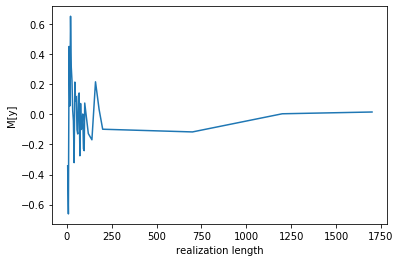

In [20]:
plt.ylabel('M[y]')
plt.xlabel('realization length')
plt.plot(T_vals, my_erg);

### Оценка дисперсии для эргодического процесса

In [21]:
def get_ergodic_disp(y, T, dt):
    my = get_ergodic_exp(y, T, dt)
    return dt / T * np.sum((np.array(y) - my)**2)

def plot_ergodic_disp(dt, h):
    my_erg = []
    T_vals = list(range(5, 100, 5)) + list(range(100, 200, 20)) + list(range(200, 2000, 500))
    
    for T in T_vals:
        print(T)
        big_t, realizations_big_t = get_realizations(0, T, T * 10, 1, h)
        my_erg.append(get_ergodic_disp(realizations_big_t[0], T, 0.1))
    
    return T_vals, my_erg

In [22]:
T_vals, my_erg = plot_ergodic_disp(dt, h)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
120
140
160
180
200
700
1200
1700


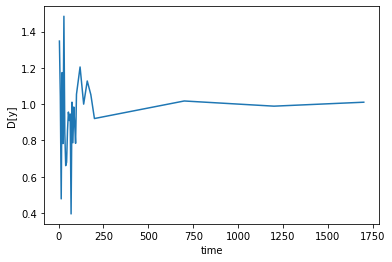

In [23]:
plt.ylabel('D[y]')
plt.xlabel('time')
plt.plot(T_vals, my_erg);

### Доверительные интервалы для матожиданий

In [24]:
import scipy.stats


def expectation(z):
    return sum(z) / len(z)


def dispersion(z):
    mx = expectation(z)
    return sum((z - mx) ** 2) / (len(z) - 1)


def get_exp_interval(s, val, n):
    return s * scipy.stats.norm.ppf(val) / np.sqrt(n)


def get_expectaion_intervals(realizations, n, prob):
    realizations = np.array(realizations)
    my_l = []
    my_r = []
    mys = []
    
    for i in range(n):
        y_ti = realizations[:, i]
        my = expectation(y_ti)
        σ = math.sqrt(dispersion(y_ti))
        
        my_exp_len = get_exp_interval(σ, prob, len(y_ti))
        
        mys.append(my)
        my_l.append(my - my_exp_len)
        my_r.append(my + my_exp_len)
    
    return mys, my_l, my_r

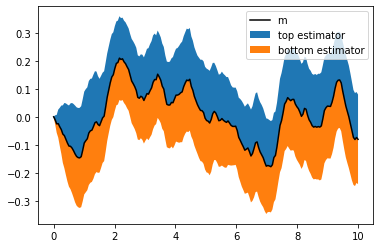

In [25]:
prob = 0.95
mys, my_l, my_r = get_expectaion_intervals(realizations, n, prob)

plt.fill_between(t, mys, my_r, label='top estimator')
plt.plot(t, mys, color='black', label='m')
plt.fill_between(t, mys, my_l, label='bottom estimator')
plt.legend();

### Доверительный интервалы для дисперсий

In [26]:
def get_dispersion_borders_known(s, alpha, n):
    l = s * n / chi2.ppf(1 - alpha / 2, n)
    r = s * n / chi2.ppf(alpha / 2, n)
    return l, r

def get_dispersion_intervals(realizations, n, α):
    realizations = np.array(realizations)
    dy_l = []
    dy_r = []
    dys = []
    
    for i in range(n):
        y_ti = realizations[:, i]
        my = expectation(y_ti)
        dy = dispersion(y_ti)
        σ = math.sqrt(dy)
        
        dy_len = get_exp_interval(σ, 1 - α, len(y_ti))
        
        dys.append(dy)
        dy_l.append(dy - dy_len)
        dy_r.append(dy + dy_len)
    
    return dys, dy_l, dy_r

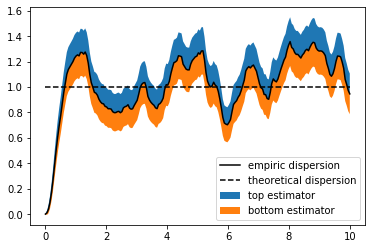

In [27]:
dy_alpha = 0.05
dys, dy_l, dy_r = get_dispersion_intervals(realizations, n, dy_alpha)

plt.hlines(D, t0, t1, linestyles='dashed', label='theoretical dispersion')
plt.fill_between(t, dys, dy_r, label='top estimator')
plt.plot(t, dys, color='black', label='empiric dispersion')
plt.fill_between(t, dys, dy_l, label='bottom estimator')
plt.legend();

### Построим эмпирическую автокорреляционную функцию

In [28]:
def emp_R(y, dt, n):
    r_vals = []
    for k in range(n):
        lim = n - k
        r_vals.append((1 / lim) * sum(y[i] * y[i + k] for i in range(lim)))
    
    return r_vals
  
def theor_R(R, dt, n):
    return [R(dt * i) for i in range(n)]

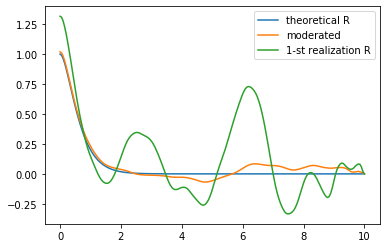

In [29]:
R = get_R(D, alpha)

# усреднение по реализациям
rys = np.array([emp_R(realizations[i], dt, n) for i in range(m)])

emp_r = [np.mean(rys[:, i]) for i in range(n)] 
th_R = theor_R(R, dt, n)

plt.plot(t, th_R, label='theoretical R')
plt.plot(t, emp_r, label='moderated')
plt.plot(t, rys[0], label='1-st realization R')
plt.legend();

### Оценка отклонения эмпирической автокорреляционной функции

In [30]:
def ek(R_th, R_emp, k):
    return R_emp[k] - R_th[k]

def autocorr_M(R_th, R_emp):
    n = len(R_th)
    return np.mean([ek(R_th, R_emp, k) for k in range(n)])
    
def autocorr_D(R_th, R_emp):
    n = len(R_th)
    mr = autocorr_M(R_th, R_emp)
    return np.mean([(ek(R_th, R_emp, k) - mr)**2 for k in range(n)])

In [31]:
print('dispersion for R deviation', autocorr_D(th_R, emp_r))
print('expectation for R deviation', autocorr_M(th_R, emp_r))

dispersion for R deviation 0.0015053534778154535
expectation for R deviation 0.016989734901476376


### Проверим стационарность (единичный корень)

In [32]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

import random


class StationarityTests:
    def __init__(self, significance=0.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.stationary = None

    def ADF_stationarity_test(self, timeseries, printResults=True):
        # Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')

        self.pValue = adfTest[1]

        self.stationary = self.pValue < self.SignificanceLevel

        if printResults:
            dfResults = pd.Series(adfTest[0:4],
                                  index=['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])
            # Add Critical Values
            for key, value in adfTest[4].items():
                dfResults['Critical Value (%s)' % key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [33]:
y = get_realization(n, h, dt)

sTest = StationarityTests()
sTest.ADF_stationarity_test(y, True)
print("Is the time series stationary? {0}".format(sTest.stationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -3.887910
P-Value                   0.002126
# Lags Used               1.000000
# Observations Used     198.000000
Critical Value (1%)      -3.463815
Critical Value (5%)      -2.876251
Critical Value (10%)     -2.574611
dtype: float64
Is the time series stationary? True
